# **Craft a Story from a Dataset**

The 2014 killing of Michael Brown in Ferguson, Missouri, began the protest movement culminating in Black Lives Matter and an increased focus on police accountability nationwide.

Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.
It's difficult to find reliable data from before this period, as police killings haven't been comprehensively documented, and the statistics on police brutality are much less available. As a result, a vast number of cases go unreported.

The Washington Post is tracking more than a dozen details about each killing - including the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. They have gathered this information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many caphics.

The following dataset from Kaggle tries to encompass all this information in an easily manipulable format for data analysis (https://www.kaggle.com/datasets/kwullum/fatal-police-shootings-in-the-us/data). What race were most of the victims? Did many incidents involve armed persons? Did police officers involved in the killings have a body camera? Many questions could be asked to gain insight into a gloomy subject, so let's begin.

First, some housekeeping is required.

In [5]:
# Import relevant libraries
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read the first few thousand bytes of the file to detect encoding
with open("PoliceKillingsUS.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # Read a sample
    detected_encoding = result["encoding"]

print("Detected Encoding:", detected_encoding)

Detected Encoding: Windows-1252


In [7]:
# Read the CSV file using the detected encoding and parse dates on appropriate column
police_killings = pd.read_csv('PoliceKillingsUS.csv', encoding=detected_encoding, parse_dates=['date'], dayfirst=True)
print(f"(rows, columns): {police_killings.shape}")
police_killings.head()

(rows, columns): (2535, 14)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Now, let's get an overall picture for the amount of police killings over time.

In [9]:
# Extracting month name and creating new column
police_killings['month'] = police_killings.date.dt.month_name()

# Separating data by year for cleaner graphing
deaths2015 = police_killings[police_killings.date.dt.year == 2015]
deaths2016 = police_killings[police_killings.date.dt.year == 2016]
deaths2017 = police_killings[police_killings.date.dt.year == 2017]

In [10]:
# Grouping by month for each year
deaths_by_date2015 = deaths2015.groupby('month', sort=False)['name'].count()
deaths_by_date2016 = deaths2016.groupby('month', sort=False)['name'].count()
deaths_by_date2017 = deaths2017.groupby('month', sort=False)['name'].count()

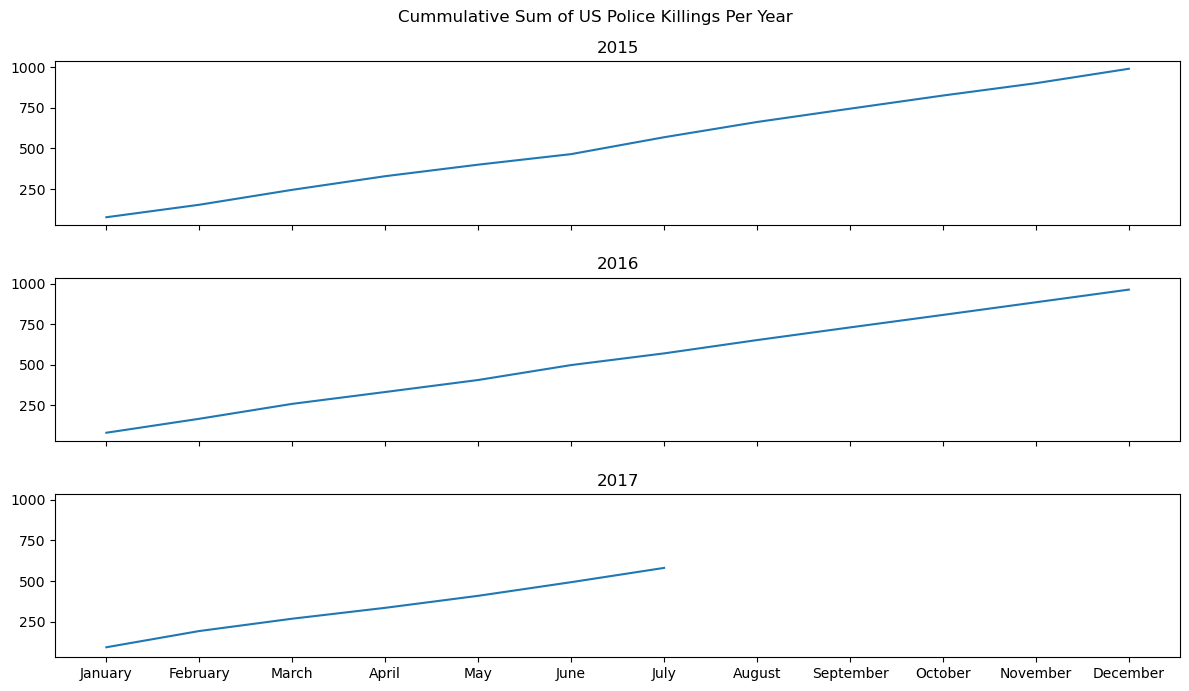

In [11]:
# Graphing cummulative sum of deaths for each year
fig, ax = plt.subplots(3, sharex=True, sharey=True, figsize=(12, 7))
ax[0].plot(deaths_by_date2015.index, deaths_by_date2015.values.cumsum())
ax[1].plot(deaths_by_date2016.index, deaths_by_date2016.values.cumsum())
ax[2].plot(deaths_by_date2017.index, deaths_by_date2017.values.cumsum())
ax[0].set_title("2015")
ax[1].set_title("2016")
ax[2].set_title("2017")
fig.suptitle("Cummulative Sum of US Police Killings Per Year")
fig.tight_layout(h_pad=2);

Each year has seen a steady increase of police killings, with 2015 and 2016 seeing a cummulative sum reach about 1000 deaths. Since we have no relevant data from previous years to determine whether this trend is alarming, one may think no reasonable conclusion can be drawn from these graphs. However, the value of graphs like these is seen later in time. Figures like these are informative and raise awareness of the current state of a particular situation. Once a noticeable increase or decrease occurs, the appropriate action can be taken. This is what a movement like this is designed to do.

Next, let's examine the relationship between police killings and race, notably the most relevant statistic regarding this movement.

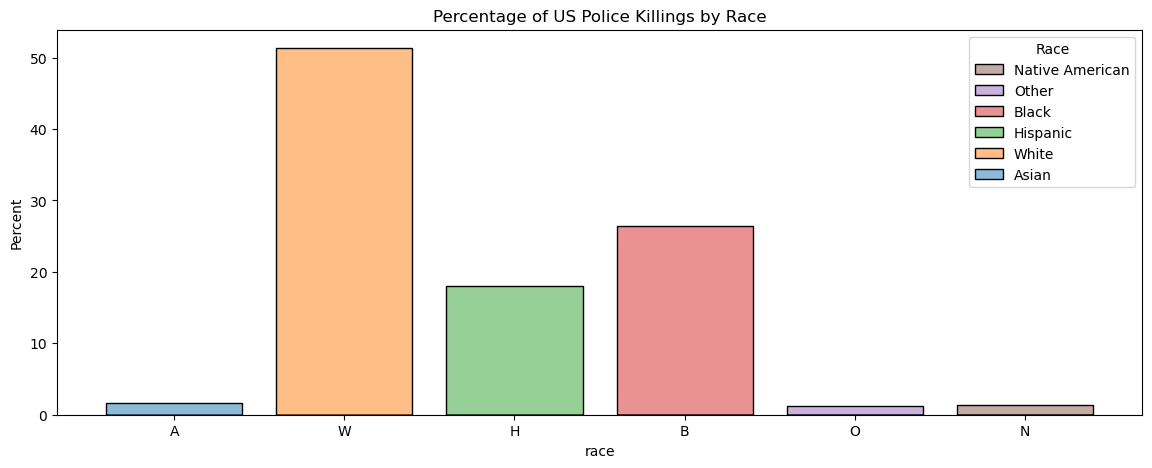

In [14]:
# Gathering percentage of killings by race
plt.figure(figsize=(14, 5))
sns.histplot(police_killings, x='race', hue='race', stat='percent', shrink=0.8)
plt.legend(title='Race', loc='upper right', labels=['Native American', 'Other', 'Black', 'Hispanic', 'White', 'Asian'])
plt.title("Percentage of US Police Killings by Race");

Right away we can see the white population is involved in more police killings than any other race. However, this race is the majority of the general population. Do the proportions of race for the general population match the proportions seen here?

According to a Wikipedia page using census data from the 2020 Census (https://en.wikipedia.org/wiki/Demographics_of_the_United_States#Race_and_ethnicity), the Black or African American race makes up approximately 12% of the US population. In the histogram above, the black population is involved in almost 30% of police killings. That's over 2x the amount! This information alone is definitely cause for concern.

The next category of interest is the 'armed' column. This column contains information regarding whether the victim was armed and what object they were armed with. Since there were a variety of possible answers in this column, we will only look at the top six responses.

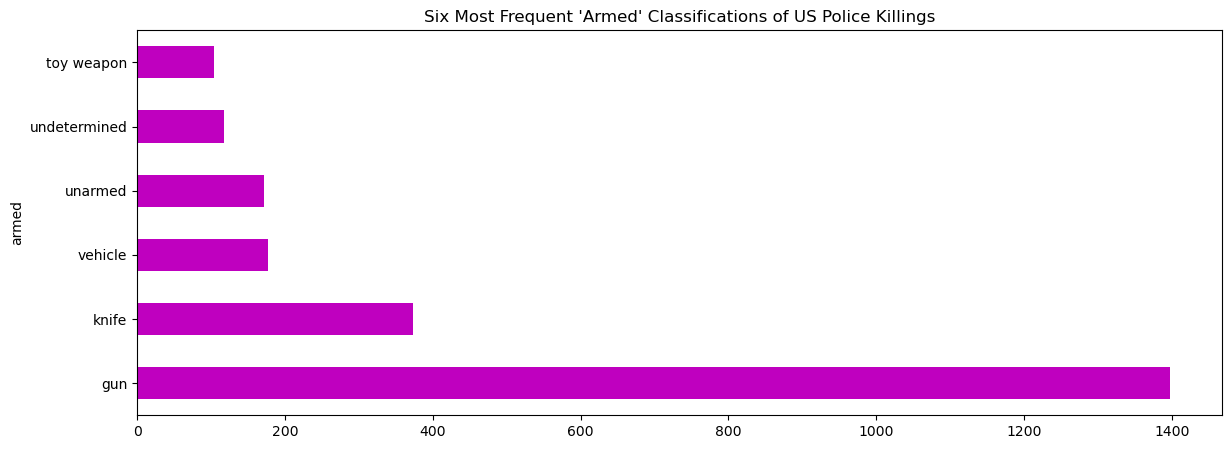

In [17]:
# Extracting 6 largest occurrences for armed column for cleaner graphing
plt.figure(figsize=(14, 5))
armed = police_killings.armed.value_counts().nlargest(6)
armed.plot(kind='barh', color='m')
plt.title("Six Most Frequent 'Armed' Classifications of US Police Killings");

It seems that a large number of victims were armed with a firearm or knife, both of which might have made an officer fear for their life. A decent number of victims were unarmed or classified mysteriously as 'undetermined' as well as a small number of instances involving a toy gun. This may suggest that most police officers involved in these killings felt justified in their actions given the circumstances, but this does not shed light on why those vicitms who were unarmed were involved in these killings. We need to explore other areas of our dataset to gain a better understanding.

Signs of mentall illness will be our next focal point.

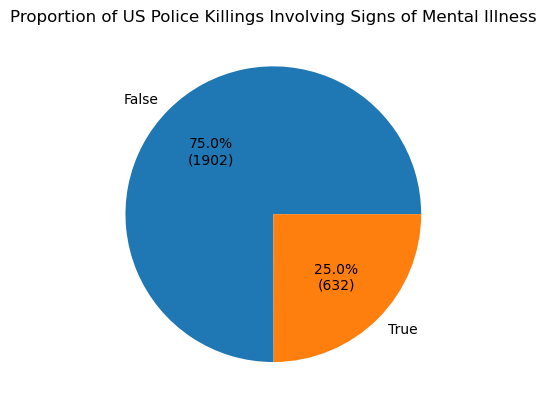

In [20]:
# Grouping two categories together to gather counts
mental_illness = police_killings.groupby('signs_of_mental_illness')['name'].count()

# Creating function to use later in autopct argument of pie chart
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating pie chart
plt.pie(mental_illness.values, labels=mental_illness.index, autopct=lambda pct: func(pct, mental_illness.values))
plt.title("Proportion of US Police Killings Involving Signs of Mental Illness");

1 in every 4 victim showed signs of mental illness. This could definitely attribute to the question we raised in the previous section. Someone acting abnormally may prompt an abnormal response, though death is not exactly a justifiable response. Would a different measure in our dataset shine more light on the behavior of our victims before their death?

Let's take a look at the threat level associated with each instance.

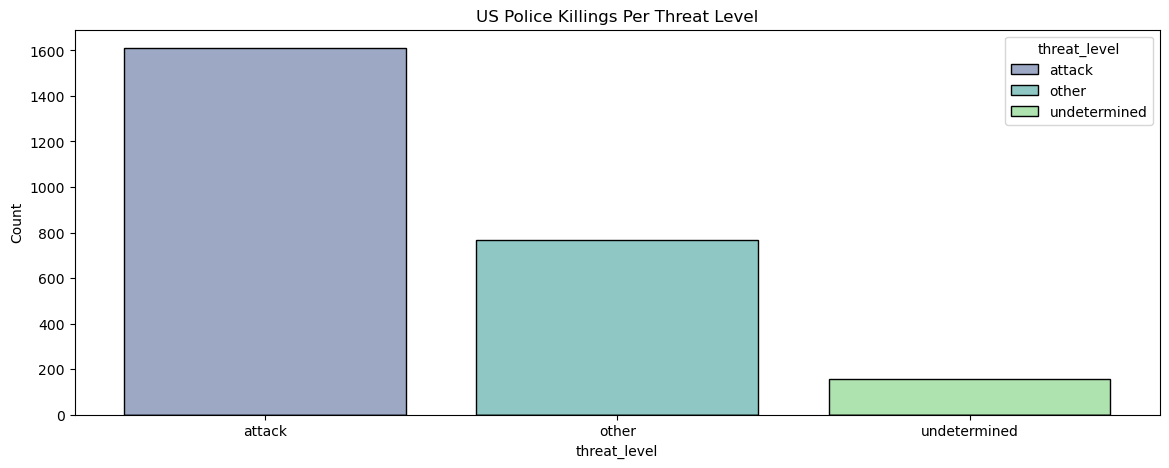

In [23]:
# Creating histogram for threat level categories
plt.figure(figsize=(14, 5))
sns.histplot(police_killings, x='threat_level', hue='threat_level', palette='viridis', shrink=0.8)
plt.title("US Police Killings Per Threat Level");

Over half of the police killings involved an 'attack' threat level. The original dataset gives little information regarding what exactly this threat level consists of, but I think it is reasonable to assume that the police office involved was being attacked. However, the meaning of the other categories is unclear. These are very vague identifiers, which could be possibly seen as a strategic move by some. Nevertheless, we still do not have a clear picture of our data.

Looking at a more definitive category, we will separate the 'flee' classifiers and examine the age of the victims for each group. We will also divide each group by male and female.

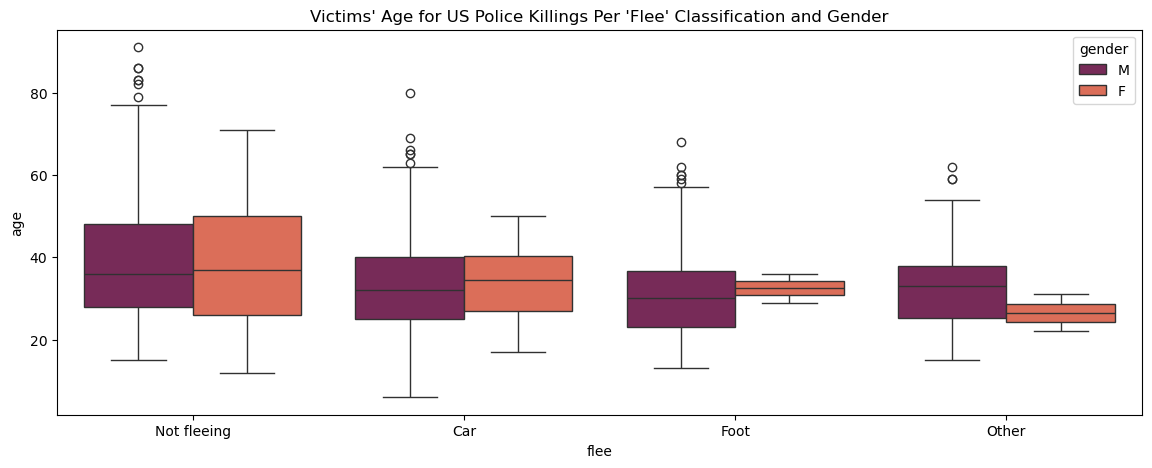

In [26]:
# Creating box plot
plt.figure(figsize=(14, 5))
sns.boxplot(police_killings, x='flee', y='age', hue='gender', palette='rocket')
plt.title("Victims' Age for US Police Killings Per 'Flee' Classification and Gender");

Most victims who did not flee were typically of older age, which logically makes sense. Younger people are more agile typically. The boxplots for female victims tend to have a smaller spread while the boxplots for male victims have a lot more outliers. Given this information, if you were to pick an older victim from our dataset at random, it is likley that they are male. This is a better graph for exploration because we were able to draw a lot of insight about the victims in our data.

One more category from our dataset is worth analyzing.

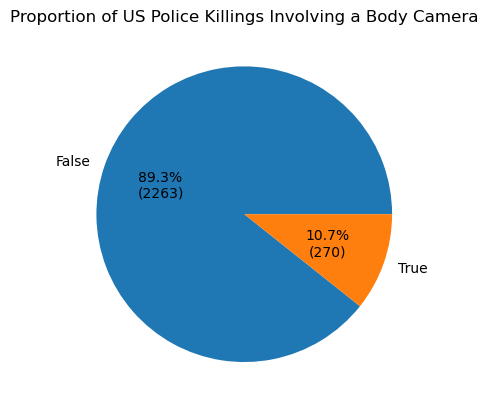

In [29]:
# Grouping two categories together to gather counts
body_camera = police_killings.groupby('body_camera')['name'].count()

# Creating pie chart
plt.pie(body_camera.values, labels=body_camera.index, autopct=lambda pct: func(pct, body_camera.values))
plt.title("Proportion of US Police Killings Involving a Body Camera");

Almost 90% of police killings involved officers that did not have a body camera. If information like this did not already prompt more body camera requirements in police departments, it likely will. This is an easy way to record situations of interest to be easily deciphered by third parties afterwards. 

### *Conclusion*

There were around 1000 victims of police killings in the US between 2015 and 2016. Using absolute figures, most of the victims were white, but relatively speaking, most victims were black. Most victims were armed in a way that would be considered dangerous, but not all were. 1 in 4 victims showed signs of mental illness. More than half of police officers were being attacked, with other officers classified the victims' actions as 'other' or 'undetermined'. Older victims from our dataset were less likely to flee. There is a greater diveristy in the age of victims among males versus females. Finally, 9 out of 10 police officers involved in these killings did not have a body camera.

It could be easy to jump to conclusions when gathering data such as this, but I think the most reasonable insight to draw from this analysis is that we do not have clear picture of what is happening. However, there are ways to gain clarity on the situation. This could include more body camera requirements, mental health education for better pattern identification, behavioral training identifying important factors of potentially dangerous scenarios for influencing officers' reactions, consistently tracking and monitoring killings per year. This comes down to accountability. In order to reasonably say that police officers are doing their job to the best of their abilities and not absuing their powers, we need data that reflects this. Then, figures regarding race will not be so prominent. But for the time being, people should have the right to be asking why this figure is so disproportionately high.

We were able to unearth many key statistics in our data exploration, but a lot more questions were raised in the process. This truly is the trademark of a great analysis.